In [1]:
from tournament.agents.constant import AllC, AllD
from tournament.agents.pavlov import Pavlov
from tournament.agents.q_learning.dqn import DeepQLearner
from tournament.agents.tft import TFTT, GenerousTFT, TitForTat
from tournament.environments.single import SingleRuleBasedAgentEnvironment
from tournament.environments.multiple import MultipleRuleBasedAgentEnvironment
from tournament.agents.agents import AGENTS
from tournament.agents.axelrod_first import (
    Davis,
    Downing,
    Feld,
    Graaskamp,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
)
from tournament.tournament import RoundRobinTournament

import torch
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 12)

In [2]:
# env = SingleRuleBasedAgentEnvironment(TitForTat)
env = MultipleRuleBasedAgentEnvironment([
    TitForTat,
    AllC,
    AllD,
    Davis,
    Downing,
    Feld,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
])

In [3]:
class QLearningTest(DeepQLearner):
    lookback = 4
    epsilon = 0.2

agent = QLearningTest()

In [4]:
env.train(
    trainee=agent,
    continuation_probability=1,
    limit=200,
    noise=0,
    repetitions=50,
    epochs=10,
)

TRAINING AGAINST  <class 'tournament.agents.tft.TitForTat'>
POSTMATCH 1: tensor([[2.3444, 2.4873]], grad_fn=<ReluBackward0>) 6.886312038073084
POSTMATCH 2: tensor([[0.8223, 0.1102]], grad_fn=<ReluBackward0>) 6.3024122284696205
POSTMATCH 3: tensor([[3.5914, 3.3669]], grad_fn=<ReluBackward0>) 6.448320475740281
POSTMATCH 4: tensor([[5.9481, 5.6036]], grad_fn=<ReluBackward0>) 6.576713636162167
POSTMATCH 5: tensor([[9.8748, 9.9404]], grad_fn=<ReluBackward0>) 6.1221575887340585
POSTMATCH 6: tensor([[14.5863, 13.7401]], grad_fn=<ReluBackward0>) 5.479526411002152
POSTMATCH 7: tensor([[20.2930, 20.8267]], grad_fn=<ReluBackward0>) 4.957785132988276
POSTMATCH 8: tensor([[39.8974, 35.2259]], grad_fn=<ReluBackward0>) 4.603297914387587
POSTMATCH 9: tensor([[43.6261, 39.5565]], grad_fn=<ReluBackward0>) 4.227586371975811
POSTMATCH 10: tensor([[52.7788, 52.4793]], grad_fn=<ReluBackward0>) 3.8800556508568427
POSTMATCH 11: tensor([[54.7113, 53.8747]], grad_fn=<ReluBackward0>) 3.610978442965532
POSTMATCH 

In [5]:
print(agent._q_network)
print(env.counts)

s = sum(env.counts.values())

print({a: env.counts[a] / s for a in env.counts})

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=2, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=2, bias=True)
)
{<Action.COOPERATE: 0>: 214004, <Action.DEFECT: 1>: 1185996}
{<Action.COOPERATE: 0>: 0.15286, <Action.DEFECT: 1>: 0.84714}


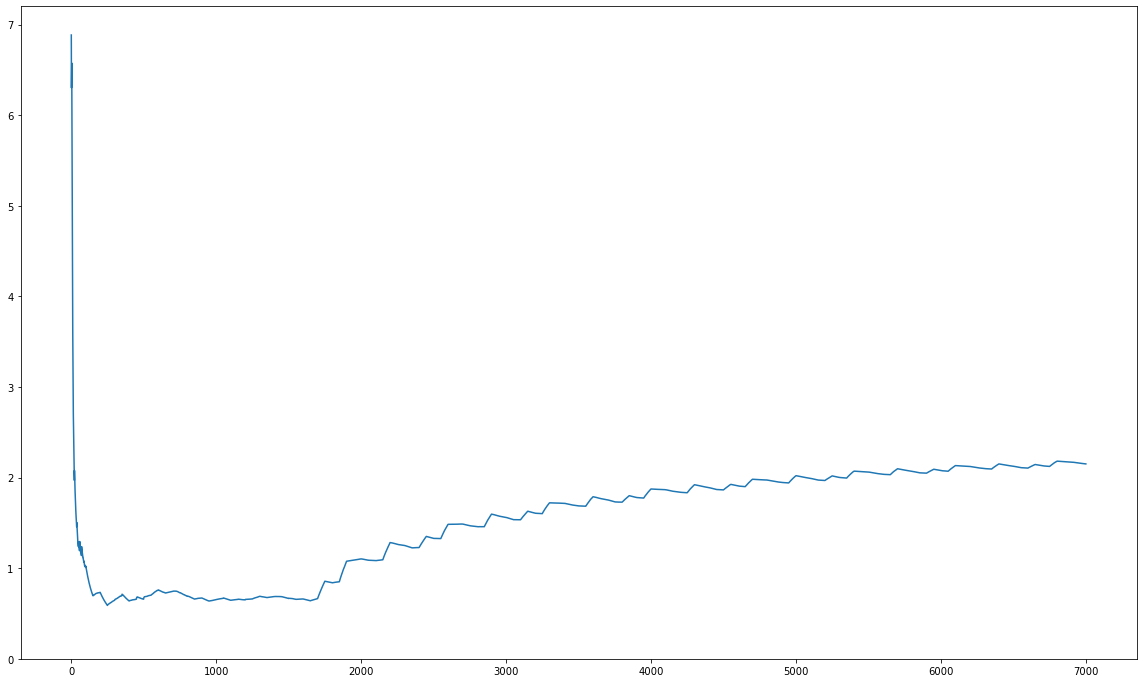

In [6]:
plt.plot(agent._losses)
plt.ylim(bottom=0)
plt.show()

In [7]:
torch.save(agent._q_network.state_dict(), "model.pt")

In [8]:
agent._q_network.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.2979, -0.5577],
                      [-0.0804, -0.0928],
                      [ 0.3956, -0.8786],
                      [-0.1596, -0.1659],
                      [-0.3101, -0.8387],
                      [-0.1890, -0.5509],
                      [ 0.4206, -0.6184],
                      [-0.5959,  0.1441],
                      [ 0.3483,  1.7771],
                      [-0.1983, -0.3433],
                      [-0.6222, -0.2939],
                      [-0.2326, -0.4645],
                      [-0.6832,  0.5496],
                      [-0.2992,  0.3745],
                      [-0.2191, -0.3564],
                      [-0.0817,  0.0979]])),
             ('layer1.bias',
              tensor([-0.0363, -0.4335, -0.4727, -0.0191, -0.2806, -0.0792, -0.4583, -0.5897,
                       6.8688, -0.2505, -0.1562, -0.0337, -0.6387, -0.3802, -0.1087, -0.3236])),
             ('layer2.weight',
              tensor([[-3.0984e-01, -9.3884

In [9]:
agent._q_network.eval()

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=2, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=2, bias=True)
)

In [12]:
# tournament = RoundRobinTournament([
#     AllC,
#     AllD,
#     TitForTat,
#     Davis,
#     Downing,
#     Feld,
#     Graaskamp,
#     Grofman,
#     Grudger,
#     Joss,
#     Nydegger,
#     Shubik,
#     SteinAndRapoport,
#     TidemanAndChieruzzi,
#     Tullock
# ], [agent])

tournament = RoundRobinTournament(AGENTS, [agent])

scores, times = tournament.play(
    continuation_probability=0.99654, repetitions=50, jobs=12
)

results = [
    (agent, round(sum(scores[agent]) / len(scores[agent])), sum(times[agent]))
    for agent in scores
]
results.sort(key=lambda x: x[1], reverse=True)

for c, score, time in results:
    print(f"{c.__name__:<30} {score:<20} {time:<20}")


100%|██████████| 961/961 [04:14<00:00,  3.78matches/s]

White              772                  22.279875           
GenerousTFT                    769                  17.26856            
Borufsen                       769                  20.305147           
Weiner                 766                  53.321341           
TidemanAndChieruzzi            765                  22.080433999999997  
Davis                          764                  27.18455            
TitForTat                      763                  15.589261000000002  
SteinAndRapoport               763                  57.24883000000002   
GradualTFT                     763                  415.7135            
TidemanAndChieruzzi2    761                  27.209493000000002  
Black              757                  26.593305000000008  
OmegaTFT                       755                  19.067382           
Leyvraz                        751                  118.961353          
Champion                       750                  102.58912699999998  
GraaskampAndKatze